# Random Forest Classification

In this exercise we will be tuning the RandomForest hyperparameters

Satrt by Importing useful libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data which is included in the 'data_banknote_authentication.csv' file

In [3]:
df = pd.read_csv("data_banknote_authentication.csv")


Diving the data into features and labels (X and y)

In [10]:
df

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


Splitting the data into train and test parts

In [14]:
X = df.drop('Class',axis=1)
y = df['Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Use the RandomForest model with a GridSearch to optimize 'n_estimators', 'max_features' and 'criterion' parameters

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings 
warnings.filterwarnings('ignore') 
test_error = []
for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))
 

Evaluate the model by displaying a confusion matrix and a classification report 

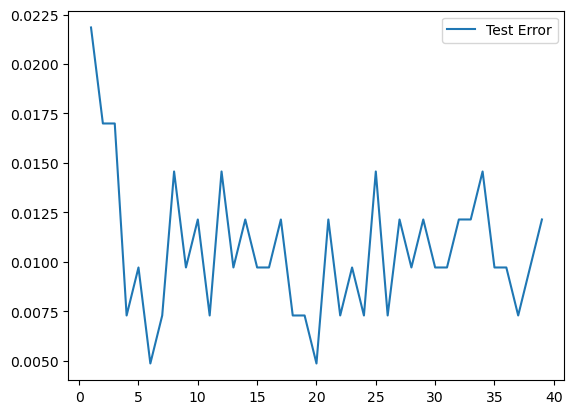

In [30]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define pipeline
scaler = StandardScaler()
rf = RandomForestClassifier()
operations = [('scaler', scaler), ('rf', rf)]
pipe = Pipeline(operations)

# Define hyperparameters
k_values = list(range(4, 20))  # n_estimators for RF
maxf = list(range(1, 5))  # max_features for RF

# Correct param_grid with proper prefix
param_grid = {
    'rf__n_estimators': k_values,
    'rf__max_features': maxf,
    'rf__criterion': ['gini', 'entropy']
}

# Grid Search with Cross Validation
full_search = GridSearchCV(pipe, param_grid, scoring='accuracy')

# Fit model (Ensure X_train and y_train are defined)
full_search.fit(X_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_features': [1, 2, 3, 4],
                         'rf__n_estimators': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                              14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [45]:
full_search.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('rf', RandomForestClassifier(max_features=1, n_estimators=19))],
 'verbose': False,
 'scaler': StandardScaler(),
 'rf': RandomForestClassifier(max_features=1, n_estimators=19),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 1,
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__min_weight_fraction_leaf': 0.0,
 'rf__n_estimators': 19,
 'rf__n_jobs': None,
 'rf__oob_score': False,
 'rf__random_state': None,
 'rf__verbose': 0,
 'rf__warm_start': False}

In [47]:
pred=full_search.predict(X_test)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
confusion_matrix(y_test,pred)

array([[234,   4],
       [  0, 174]], dtype=int64)

In [59]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       238
           1       0.98      1.00      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define pipeline
scaler = StandardScaler()
rf = RandomForestClassifier()
operations = [('scaler', scaler), ('rf', rf)]
pipe = Pipeline(operations)

# Define hyperparameters
k_values = list(range(4, 20))  # n_estimators for RF
maxf = list(range(1, 5))  # max_features for RF

# Correct param_grid with proper prefix
param_grid = {
    'rf__n_estimators': k_values,
    'rf__max_features': maxf,
    'rf__criterion': ['gini', 'entropy']
}

# Grid Search with Cross Validation
full_search = GridSearchCV(pipe, param_grid, scoring='accuracy',cv=5)

# Fit model (Ensure X_train and y_train are defined)
full_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_features': [1, 2, 3, 4],
                         'rf__n_estimators': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                              14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [69]:
pred=full_search.predict(X_test)

In [71]:
confusion_matrix(y_test,pred)

array([[235,   3],
       [  0, 174]], dtype=int64)

In [73]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       238
           1       0.98      1.00      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

